<a href="https://colab.research.google.com/github/a-brhian/Vibrations/blob/main/03_Transformada_de_Wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transformada de Wavelet

In [ ]:
#!pip install pywt matplotlib numpy

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


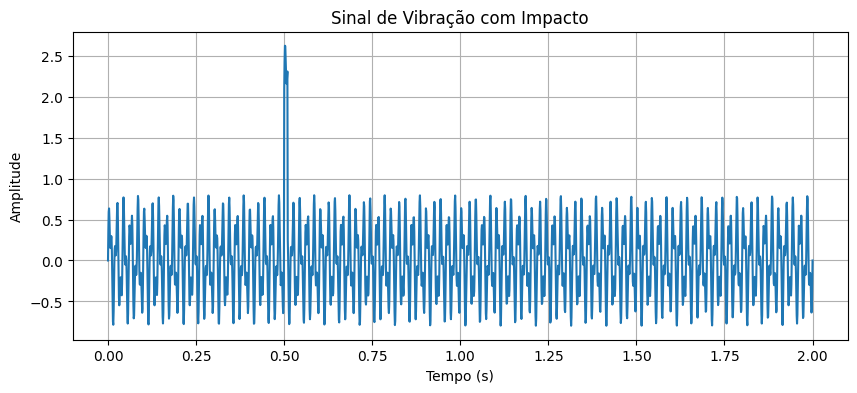

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Configurações do sinal
fs = 1000  # Hz
t = np.linspace(0, 2, 2*fs)  # 2 segundos de sinal

# Sinal de vibração com duas frequências e um choque
signal = 0.5*np.sin(2*np.pi*50*t) + 0.3*np.sin(2*np.pi*120*t)
signal[500:510] += 2  # impacto breve

# Plot do sinal
plt.figure(figsize=(10,4))
plt.plot(t, signal)
plt.title('Sinal de Vibração com Impacto')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


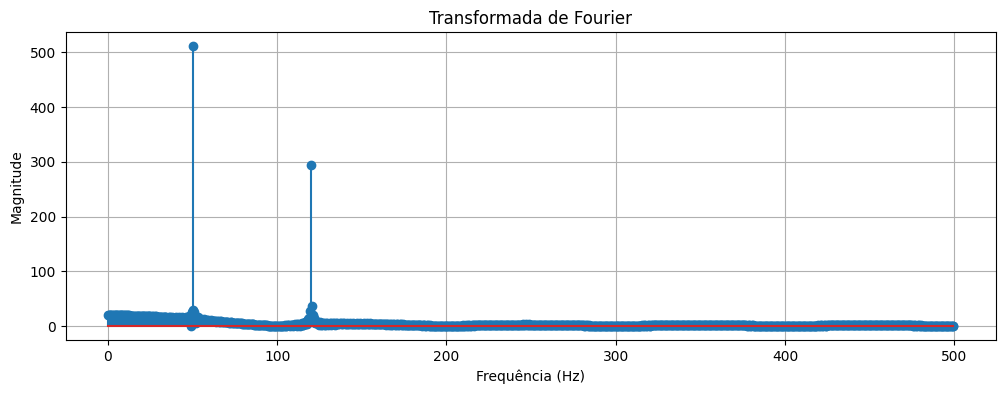

In [ ]:
# --- Análise FFT ---
fft_vals = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(t), 1/fs)

plt.figure(figsize=(12,4))
plt.stem(fft_freq[:len(t)//2], np.abs(fft_vals[:len(t)//2])) # Usando plt.stem para barras e pontos
plt.title('Transformada de Fourier')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

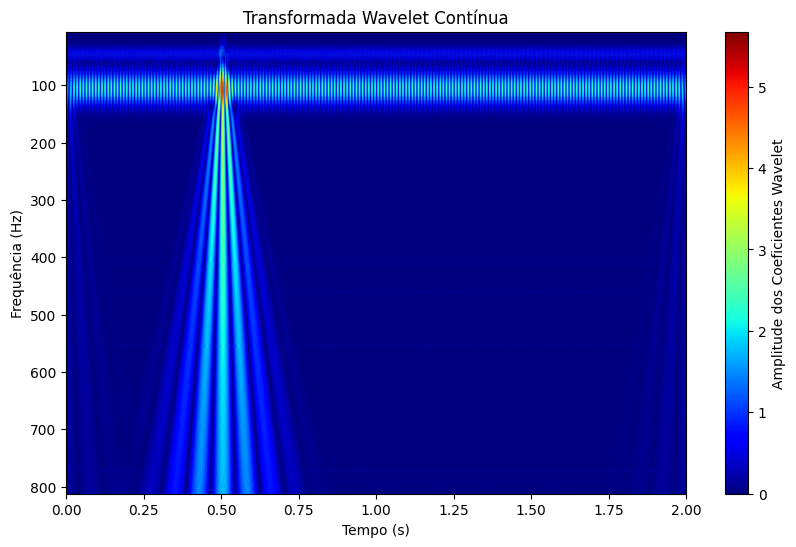

In [ ]:
# Wavelet Contínua
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal, scales, 'morl', sampling_period=1/fs)

plt.figure(figsize=(10,6))
plt.imshow(np.abs(coefficients), extent=[0, 2, frequencies[0], frequencies[-1]], cmap='jet', aspect='auto') # Ajuste no extent
plt.colorbar(label='Amplitude dos Coeficientes Wavelet') # Adiciona a barra de cores
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.title('Transformada Wavelet Contínua')
plt.show()